In [1]:
import warnings
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets  # 数据集
from sklearn.model_selection import train_test_split # 数据集划分
from sklearn.linear_model import LinearRegression # 线性回归
from sklearn.impute import SimpleImputer # 缺失值填充
from sklearn.preprocessing import StandardScaler # 归一化处理
from sklearn.metrics import mean_squared_error # 均方误差
from sklearn.metrics import mean_absolute_error # 平均绝对误差
from sklearn.metrics import r2_score # r方
from sklearn.preprocessing import PolynomialFeatures # 多项式回归 多项式逻辑回归
from sklearn.datasets import make_classification # 生成合成的分类数据集
from sklearn.linear_model import LogisticRegression # 线性逻辑回归
from sklearn.model_selection import GridSearchCV # 超参数搜索
from sklearn.multiclass import OneVsRestClassifier # 多分类策略
from sklearn.multiclass import OneVsOneClassifier # 多分类策略

warnings.filterwarnings("ignore")  # 抑制所有警告
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号

# 线性算法：智若禹行水，道如丁解牛

顺势而为  
回归分析/线性模型  
线性回归(预测)、多项式回归(预测)、逻辑回归(分类)  

regression回归就是找条"线"  
大禹治水 - 回归任务(预测趋势)  
庖丁解牛 - 分类任务

【knn和线性算法的对比】  

|算法|核心|xy|输出|专注|
|-------|-----------------------------|------------------|----------------|-----------------|  
|knn算法|空间关系(距离：近朱者赤近墨者黑)|x特征维度 y特征维度|类别是离散的(颜色)|空间位置：分类任务|  
|线性算法|顺序关系(智若禹行水，道如丁解牛)|x特征向量 y输出向量|研究连续空间问题|时间先后：回归任务|

# 一元线性回归

一元：数据点只有一个特征值当自变量 $y = kx + b$    
找到一条直线 →  找到一条最好的直线  

最优化问题  
样本点的民主投票  
距离的度量

$\sum_{i=1}^{m} \left ( y_i - \hat{y_i} \right )^2$，找到参数k b使得上式的值尽可能小：  
$\mathop{\arg\max}\limits_{k,b}{\sum_{i=1}^{m} \left ( y_i - \hat{y_i} \right )^2}$，衡量了误差的大小，称损失函数loss_function

最小二乘法：
$k=\frac{\sum_{i=1}^{m}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum_{i=1}^{m}(x_{i}-\overline{x})^2}$，
$b=\overline{y}-a\overline{x}$

## boston数据集

In [2]:
boston = pd.read_csv('HousingData.csv')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
y = boston['MEDV'] # 标签-房价
X = boston.drop(['MEDV'], axis=1) #去掉标签（房价）的数据子集
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


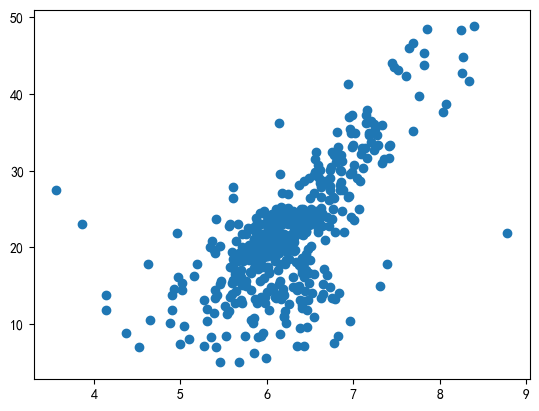

In [4]:
col_RM = boston['RM']

col_RM = col_RM[y<50] # 去除天花板 50
y = y[y<50]

plt.scatter(col_RM,y)
plt.show()

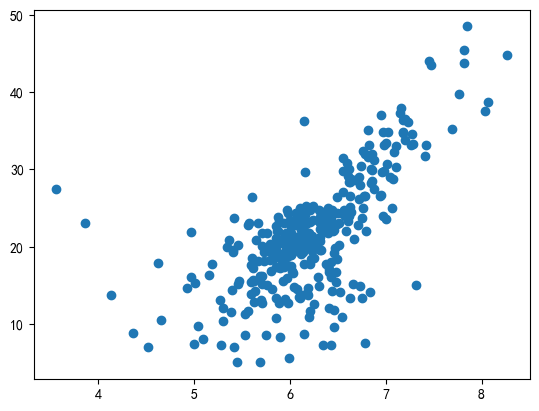

In [5]:
# 划分数据集
col_RM_train, col_RM_test, y_train, y_test = train_test_split(col_RM, y, test_size = 0.3, random_state = 0)

plt.scatter(col_RM_train, y_train)
plt.show()

## 自己实现一元线性回归

In [6]:
# 手写公式实现 一元线性回归的最小二乘法 手抄就好
def fit(x,y):
    a_up = np.sum((x-np.mean(x))*(y - np.mean(y)))
    a_bottom = np.sum((x-np.mean(x))**2)
    a = a_up / a_bottom
    b = np.mean(y) - a * np.mean(x)
    return a, b

# 在训练集上训练
a, b = fit(col_RM_train, y_train)
a, b

(8.056822140369603, -28.49306872447786)

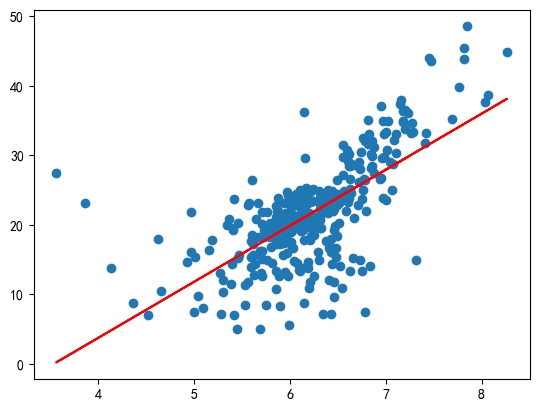

In [7]:
plt.scatter(col_RM_train, y_train)
plt.plot(col_RM_train, a*col_RM_train+b, c='r')
plt.show()

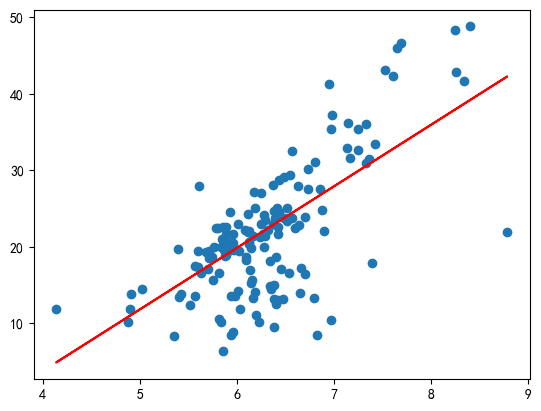

In [8]:
# a b在测试集的表现
plt.scatter(col_RM_test, y_test)
plt.plot(col_RM_test, a*col_RM_test+b, c='r')
plt.show() # 现实意义：房屋价格随房屋数量的增加而增加

## 调库sklearn实现一元线性回归

In [9]:
lin_reg = LinearRegression() # 线性回归 对象

col_RM_train_array = col_RM_train.to_numpy() # 将 Pandas Series 转换为 NumPy 数组
col_RM_train_array = col_RM_train_array.reshape(-1, 1) # 使用 reshape 方法

lin_reg.fit(col_RM_train_array, y_train) # 训练

LinearRegression()

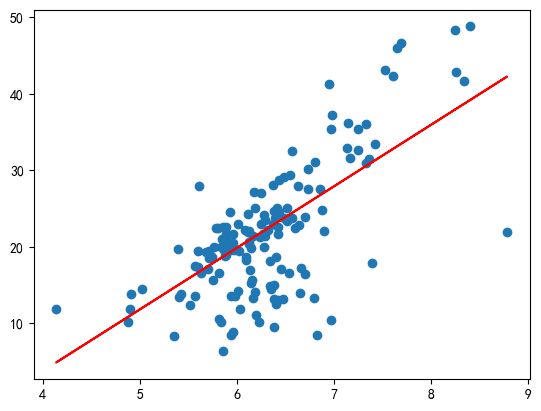

In [10]:
# 预测
col_RM_test_array = col_RM_test.to_numpy() # 将 Pandas Series 转换为 NumPy 数组
col_RM_test_array = col_RM_test_array.reshape(-1, 1) # 使用 reshape 方法

y_predict = lin_reg.predict(col_RM_test_array) # 测试

plt.scatter(col_RM_test_array, y_test)
plt.plot(col_RM_test_array, y_predict, c='r')
plt.show()

# 多元线性回归

多元：数据点有多个特征值当自变量 $y=w_0 + w_1x_1 + w_2x_2 + w_3x_3 = w_0x_0 + XW^T = XW^T$   
找到一条直线 →  找到一条最好的直线  

最优化问题  
样本点的民主投票  
距离的度量

$\sum_{i=1}^{m} \left ( y_i - \hat{y_i} \right )^2$，找到参数k b使得上式的值尽可能小：  
$\mathop{\arg\max}\limits_{W}{\sum_{i=1}^{m} \left ( y_i - \hat{y_i} \right )^2}$，衡量了误差的大小，称损失函数loss_function

多元线性回归的正规方程解(时间复杂度很高 不如梯度下降搜索)

## boston数据集

In [11]:
boston = pd.read_csv('HousingData.csv')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
# 数据预处理
boston = boston[boston['MEDV']<50]
boston.dropna(inplace=True) # 删除缺失值

y = boston['MEDV'] # 标签-房价
X = boston.drop(['MEDV'], axis=1) #去掉标签（房价）的数据子集

X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [13]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## boston数据集(在线加载)

In [14]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [15]:
X = data
y = target

X = X[y<50]
y = y[y<50]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 调库sklearn实现多元线性回归

In [16]:
lin_reg.fit(X_train, y_train) # 训练

LinearRegression()

In [17]:
lin_reg.score(X_test, y_test) # 预测效果 不好直观画图

0.7455942658788955

## 多元线性不需要归一化

In [18]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [19]:
lin_reg.fit(X_train, y_train) # 训练

LinearRegression()

In [20]:
lin_reg.score(X_test, y_test) # 预测

0.7455942658788963

# 模型评价问题(一元线性回归)

MSE：平方 累加 求平均  
RMSE：平方 累加 求平均 开根 (放大了较大误差的差距)  
MAE：绝对值 累加 求平均 (放映较为真实的误差)  
R方：比值消除了量纲的影响 (能够判断模型的拟合程度)  

RMSE MAE：无上限、与数据取值相关、只能比较前后效果变化

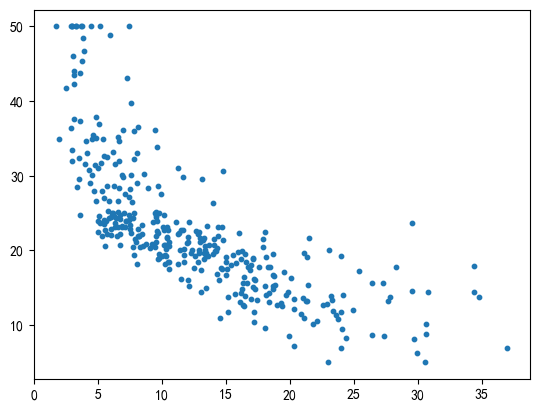

In [21]:
# 数据集的加载
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

x = data[:, -1].reshape(-1, 1)
y = target.reshape(-1, 1)

# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

plt.scatter(x_train, y_train, s = 10)
plt.show()

In [22]:
# sklearn实现线性回归
lin_reg = LinearRegression()
model = lin_reg.fit(x_train, y_train) # 训练
y_predict = model.predict(x_test) # 测试 预测

## 直观看效果

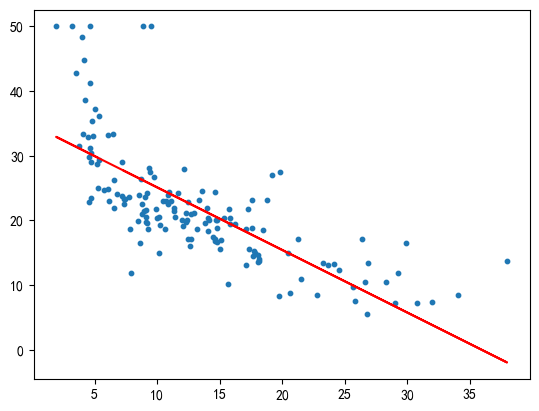

In [23]:
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, y_predict, c='r')
plt.show()

## MSE(mean square error均方误差)

In [24]:
y_real = y_test
mse = np.sum((y_real-y_predict)**2) / len(y_test)
mse # 越接近0越好

39.81715050474418

In [25]:
mean_squared_error(y_real,y_predict) # 调库实现

39.81715050474418

## RMSE(root mean square error均方根误差)

In [26]:
rmse = np.sqrt(mse) # 量纲一致
rmse

6.310083240714355

In [27]:
mean_squared_error(y_real,y_predict,squared=False) # 调库实现

6.310083240714355

## MAE(mean absolute error平均绝对误差)

In [28]:
mae = np.sum(np.abs(y_real-y_predict)) / len(y_test)
mae

4.4883446998468415

In [29]:
mean_absolute_error(y_real,y_predict) # 调库实现

4.4883446998468415

## R方(coefficient of deternination判定系数)

In [30]:
r2 = 1 - (np.sum(y_real- y_predict)**2) / (np.sum((y_real-np.mean(y_real))**2))
r2

0.9990008755157401

In [31]:
1 - mse / np.var(y_real) # 另一种理解

0.5218049526125567

In [32]:
r2_score(y_real,y_predict) # 调库实现

0.5218049526125567

In [33]:
model.score(x_test,y_test) # 线性回归模型自带的评价方法

0.5218049526125567

# 多项式回归

找一条曲线 (非线性回归 通过变量代换 转化为线性回归) <font color='red'>复杂问题简单化：不要强求不可知 要从已知推未知</font>  
非线性回归：$y=ax^2+bx+c$  
线性回归：$y=ax_1+bx_2+c$ 

为样本多添加一些特征进行升维，这些特征是原来特征的多项式项

## 自己基于线性回归实现非线性回归

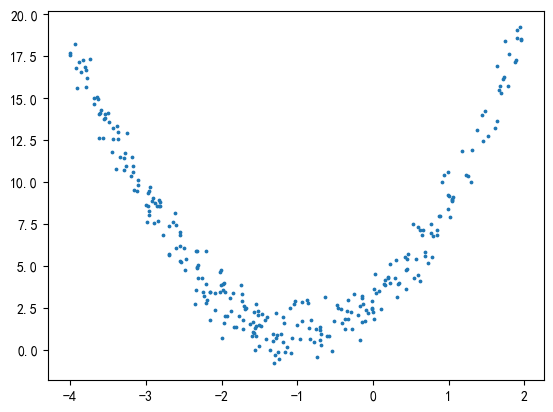

In [34]:
num = 300
x = np.random.uniform(-4,2,size=(num))
y = 2*x**2 + 4*x + 3 + np.random.randn(num)

X = x.reshape(-1,1) # 300行 1列

plt.scatter(x,y,s=3)
plt.show()

In [35]:
linear_regreesion = LinearRegression()
linear_regreesion.fit(X,y) # 训练

LinearRegression()

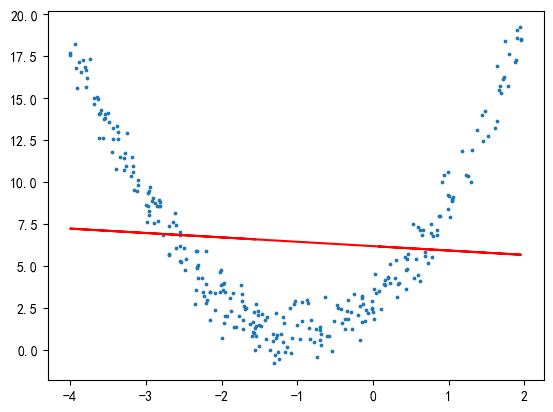

In [36]:
y_predict = linear_regreesion.predict(X) # 预测

plt.scatter(x,y,s=3)
plt.plot(x,y_predict,color='red')
plt.show() # 用线性回归的效果很差

In [37]:
# 用变量代换实现多项式回归
X[:5] # 预览

array([[-1.55879793],
       [-3.90904936],
       [ 1.71888599],
       [-1.97288236],
       [ 0.58790381]])

In [38]:
X_new = np.hstack([X,X**2])
X_new[:5]

array([[-1.55879793,  2.429851  ],
       [-3.90904936, 15.28066688],
       [ 1.71888599,  2.95456905],
       [-1.97288236,  3.89226479],
       [ 0.58790381,  0.34563089]])

In [39]:
linear_regression_new = LinearRegression()
linear_regression_new.fit(X_new,y) # 训练

LinearRegression()

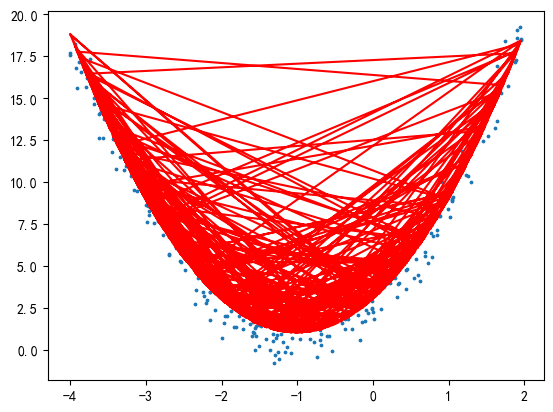

In [40]:
y_predict_new = linear_regression_new.predict(X_new) # 预测

plt.scatter(x,y,s=3)
plt.plot(x,y_predict_new,color='red')
plt.show()

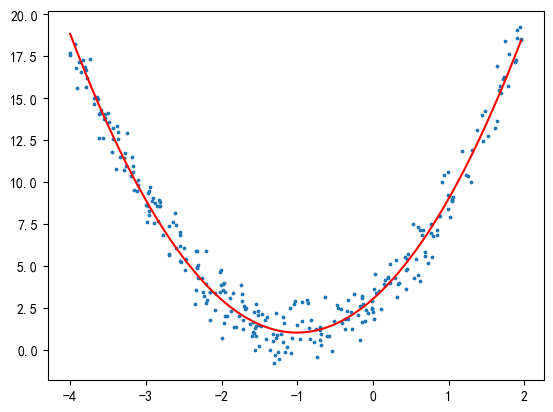

In [41]:
plt.scatter(x,y,s=3)
plt.plot(np.sort(x),y_predict_new[np.argsort(x)],color="red") # argsort x的排序索引
plt.show()

In [42]:
linear_regression_new.intercept_ # 截距 3

3.046083766853756

In [43]:
linear_regression_new.coef_ # 系数 4 2

array([3.99266271, 1.98557478])

## 调库sklearn实现多项式回归

1 多项式特征PolynomialFeatures  
2 线性模型LinearRegression  

In [44]:
polynomial_features = PolynomialFeatures(degree=2) # 最高项为2次 用于生成多项式特征
X_poly = polynomial_features.fit_transform(X)
X_poly[:5]

array([[ 1.        , -1.55879793,  2.429851  ],
       [ 1.        , -3.90904936, 15.28066688],
       [ 1.        ,  1.71888599,  2.95456905],
       [ 1.        , -1.97288236,  3.89226479],
       [ 1.        ,  0.58790381,  0.34563089]])

In [45]:
linear_regression = LinearRegression()
linear_regression.fit(X_poly,y) # 训练

LinearRegression()

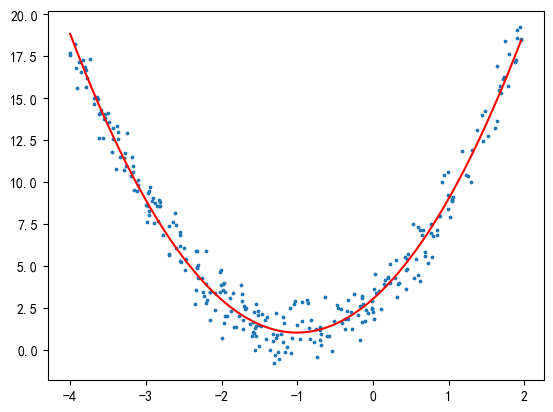

In [46]:
y_predict = linear_regression.predict(X_poly) # 预测

plt.scatter(x,y,s=3)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color="red") # argsort x的排序索引
plt.show()

# 线性逻辑回归：分类问题(没有解析解)

损失函数是超越方程(没有解析解)  
最优化问题：梯度下降、正则化regularzation(L1范式 lasso回归)(l2范式 ridge回归)(弹性网络ElasticNet)

## 加载数据集

In [47]:
x,y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0, # 冗余特征
    n_classes=2,
    n_clusters_per_class=1, # 每个类别中的簇（群集）数量
    random_state=1024)

x.shape,y.shape

((200, 2), (200,))

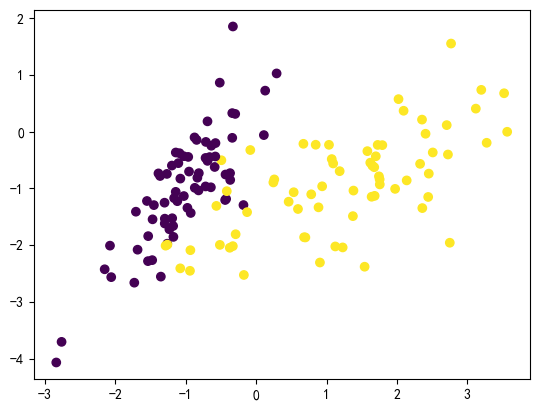

In [48]:
# 分割数据集
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=233,stratify=y) # 分层抽样stratify

plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.show()

## 线性逻辑回归

In [49]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [50]:
clf.score(x_train,y_train)

0.9357142857142857

In [51]:
clf.score(x_test,y_test)

0.95

In [52]:
clf.predict(x_test) # 预测类别

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [53]:
clf.predict_proba(x_test) #预测概率

array([[6.21458472e-05, 9.99937854e-01],
       [9.70483101e-01, 2.95168992e-02],
       [1.53542503e-02, 9.84645750e-01],
       [9.66871922e-01, 3.31280775e-02],
       [7.10484282e-02, 9.28951572e-01],
       [1.05085121e-01, 8.94914879e-01],
       [6.94750254e-03, 9.93052497e-01],
       [2.85079491e-02, 9.71492051e-01],
       [2.31134964e-02, 9.76886504e-01],
       [8.18101271e-01, 1.81898729e-01],
       [8.03390346e-03, 9.91966097e-01],
       [1.05450913e-01, 8.94549087e-01],
       [9.65238966e-01, 3.47610337e-02],
       [9.03576752e-01, 9.64232483e-02],
       [8.57617714e-01, 1.42382286e-01],
       [8.62005902e-01, 1.37994098e-01],
       [8.17973152e-01, 1.82026848e-01],
       [9.93929683e-03, 9.90060703e-01],
       [9.58054865e-01, 4.19451354e-02],
       [9.22834890e-01, 7.71651102e-02],
       [7.92488905e-01, 2.07511095e-01],
       [1.59411627e-01, 8.40588373e-01],
       [5.18463889e-01, 4.81536111e-01],
       [9.06929258e-01, 9.30707417e-02],
       [2.519298

In [54]:
np.argmax(clf.predict_proba(x_test), axis = 1) # 找到数值最大的索引

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

## 超参数搜索

In [55]:
params = [
    {'penalty': ['l2', 'l1'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear']}, 
    
    {'penalty': ['none'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs']}, 
    
    {'penalty': ['elasticnet'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
    'solver': ['saga'],
    'max_iter': [200]}
]

In [56]:
grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=params,
    n_jobs=-1
)

grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l2', 'l1'], 'solver': ['liblinear']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['none'], 'solver': ['lbfgs']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                          'max_iter': [200], 'penalty': ['elasticnet'],
                          'solver': ['saga']}])

In [57]:
grid.best_score_

0.95

In [58]:
grid.best_estimator_.score(x_test,y_test)

0.9333333333333333

In [59]:
grid.best_params_ # 搜索得到的最优超参数

{'C': 1,
 'l1_ratio': 0.75,
 'max_iter': 200,
 'penalty': 'elasticnet',
 'solver': 'saga'}

# 复杂逻辑回归：多分类策略(没有解析解)

多分类转化为二分类：  
|策略选择|时间复杂度|准确率|  
|-----------------|-------------------|------|  
|1 one vs one一对一|$\frac{n(n-1)}{2}T$|更准确|  
|2 one vs rest一对剩余|$nT$|存在类别混淆|

## 加载数据集

In [60]:
np.random.seed(0)
X = np.random.normal(0,1,size=(200,2))
y = np.array((X[:,0]**2)+(X[:,1]**2) < 2, dtype='int') # True将被编码为1，False将被编码为0
X[:5],y

(array([[ 1.76405235,  0.40015721],
        [ 0.97873798,  2.2408932 ],
        [ 1.86755799, -0.97727788],
        [ 0.95008842, -0.15135721],
        [-0.10321885,  0.4105985 ]]),
 array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0]))

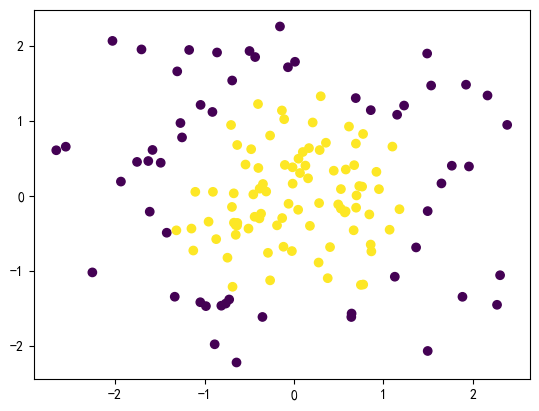

In [61]:
# 分割数据集
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=233,stratify=y) # 分层抽样stratify

plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.show()

## 多项式逻辑回归

In [62]:
# 线性逻辑回归的效果很差
clf = LogisticRegression()
clf.fit(x_train,y_train)

print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.7071428571428572
0.6666666666666666


In [63]:
# 多项式逻辑会回归
poly = PolynomialFeatures(degree=2)
poly.fit(x_train)

PolynomialFeatures()

In [64]:
x2 = poly.transform(x_train) # 对输入数据进行多项式特征转换
x2t = poly.transform(x_test) # 对输入数据进行多项式特征转换

clf.fit(x2,y_train)

LogisticRegression()

In [65]:
print(clf.score(x2,y_train))
print(clf.score(x2t, y_test))

1.0
0.9666666666666667


## 多分类的ovr和ovo

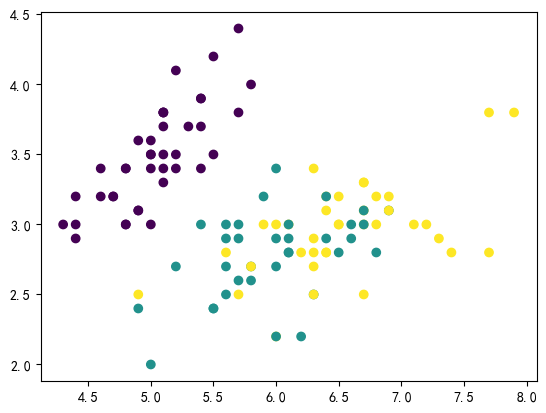

In [66]:
iris = datasets.load_iris()
x = iris.data 
y = iris.target
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=666) # 默认训练集0.75

plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [67]:
ovr = OneVsRestClassifier(clf)
ovr.fit(x_train,y_train)
ovr.score(x_test,y_test)

0.9736842105263158

In [68]:
ovo = OneVsOneClassifier(clf)
ovo.fit(x_train,y_train)
ovo.score(x_test,y_test)

1.0